# 딥러닝 한 번에 끝내기

## 1번 주제 : Boston 주택 가격 예측 모델

## 2번 주제 : Reuters 딥러닝 모델

## 3번 주제 : CIFAR10 딥러닝 모델

### 공통 라이브러리 호출

In [1]:
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt

### Boston 주택 가격 예측 모델

#### Boston 가격 데이터셋 호출

In [2]:
from keras.datasets import boston_housing

class Boston_Housing_Dataset():
    
    def __init__(self):
        (train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
        self.train_data = train_data
        self.train_labels = train_labels
        self.test_data = test_data
        self.test_labels = test_labels
    
    def __call__(self):
        return self.train_data, self.train_lables, self.test_data, self.test_labes

In [3]:
boston = Boston_Housing_Dataset()

boston_X_train = boston.train_data
boston_X_test = boston.test_data
boston_y_train = boston.train_labels
boston_y_test = boston.test_labels

In [4]:
#### 데이터셋 크기 확인
print(len(boston_X_train))
print(len(boston_X_test))

404
102


#### Boston 주택 가격 데이터셋 전처리 작업 수행

In [5]:
# train 데이터의 각 feature의 평균
mean = boston_X_train.mean(axis=0)

# train 데이터의 각 표준편차를 나누어 중앙값이 0에 가깝게 만들고, 표준편차가 1이 되게끔 조정한다.
std = boston_X_train.std(axis=0)

# test 데이터에도 같은 전처리 작업 수행
boston_X_train = (boston_X_train - mean) / std
boston_X_test = (boston_X_test - mean) / std

In [6]:
boston_X_train[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

#### Boston 주택 가격 모델 구성 및 컴파일

In [7]:
class Boston_Housing_Model():
    def __init__(self, train_data):
        self.model = models.Sequential()
        self.model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
        self.model.add(layers.Dense(32, activation='relu'))
        self.model.add(layers.Dense(1))
        self.model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
        print("Init")

    def __call__(self):
        return self.model
    
    def train(self, train_data, train_labels, test_data, test_labels):
        history = self.model.fit(train_data, train_labels,
                    epochs=300,
                    batch_size=16,
                    validation_data=(test_data, test_labels))
        return history

In [8]:
boston_model = Boston_Housing_Model(boston_X_train)

Init


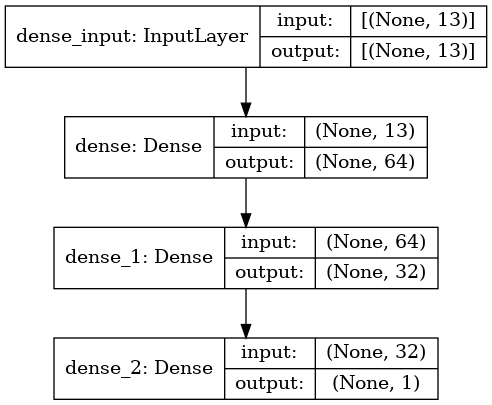

In [9]:
utils.plot_model(boston_model(), show_shapes=True)

#### Boston 주택 가격 모델 학습

In [10]:
boston_history = boston_model.train(boston_X_train, boston_y_train, boston_X_test, boston_y_test)

Epoch 1/300
26/26 [==============================] - 1s 9ms/step - loss: 544.2490 - mse: 544.2490 - mae: 21.4653 - val_loss: 525.0094 - val_mse: 525.0094 - val_mae: 21.0729
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 446.3438 - mse: 446.3438 - mae: 19.1141 - val_loss: 395.2041 - val_mse: 395.2041 - val_mae: 17.8869
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 296.0416 - mse: 296.0416 - mae: 15.0044 - val_loss: 222.2051 - val_mse: 222.2051 - val_mae: 12.6962
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 144.7247 - mse: 144.7247 - mae: 9.4464 - val_loss: 101.1715 - val_mse: 101.1715 - val_mae: 8.0372
Epoch 5/300
26/26 [==============================] - 0s 4ms/step - loss: 76.1028 - mse: 76.1028 - mae: 6.4733 - val_loss: 63.5417 - val_mse: 63.5417 - val_mae: 6.1363
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 50.2185 - mse: 50.2185 - mae: 5.2708 - val_loss: 45.2797 - val_mse: 45

#### Boston 주택 가격 학습 시각화

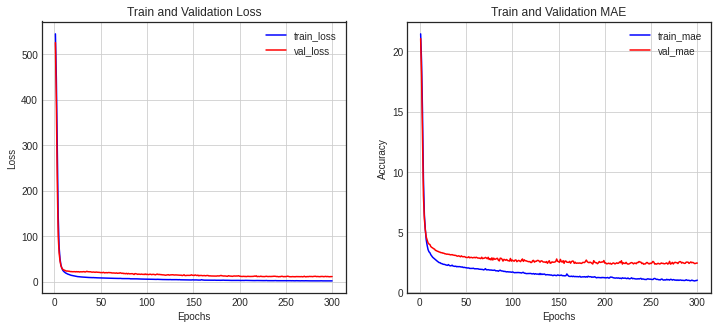

In [11]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = boston_history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

#### Boston 주택 가격 모델 평가 및 예측

In [12]:
boston_model().evaluate(boston_X_test, boston_y_test)

4/4 [==============================] - 0s 2ms/step - loss: 11.3039 - mse: 11.3039 - mae: 2.4229


[11.303853034973145, 11.303853034973145, 2.4228785037994385]

---

### Reuters 딥러닝 모델

#### 딥러닝 모델에 필요한 라이브러리 호출

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras import callbacks

#### Reuters 데이터셋 호출

In [14]:
from keras.datasets import reuters

class Reuters_Dataset():
    
    def __init__(self):
        (X_train, y_train), (test_data, test_labels) = reuters.load_data(num_words=10000)
        train_data, val_data, train_labels, val_labels = train_test_split(X_train, y_train, test_size=0.25)
        self.train_data = train_data
        self.val_data = val_data
        self.test_data = test_data
        self.train_labels = train_labels
        self.val_labels = val_labels
        self.test_labels = test_labels
        
    def one_hot_encoding(slef, data, dim=10000):
        results = np.zeros((len(data), dim))
        for i, d in enumerate(data):
            results[i, d] = 1.
        return results

In [15]:
reuters = Reuters_Dataset()

In [16]:
reuters_X_train = reuters.one_hot_encoding(reuters.train_data)
reuters_X_val = reuters.one_hot_encoding(reuters.val_data)
reuters_X_test = reuters.one_hot_encoding(reuters.test_data)

reuters_y_train = utils.to_categorical(reuters.train_labels)
reuters_y_val = utils.to_categorical(reuters.val_labels)
reuters_y_test = utils.to_categorical(reuters.test_labels)

#### Reuters 모델 구성 및 컴파일

In [17]:
class Reuters_Model():
    def __init__(self):
        self.model = models.Sequential()
        self.model.add(layers.Dense(128, input_shape=(10000,)))
        self.model.add(layers.BatchNormalization())
        self.model.add(layers.Activation('relu'))
        self.model.add(layers.Dropout(0.4))
        self.model.add(layers.Dense(128))
        self.model.add(layers.BatchNormalization())
        self.model.add(layers.Activation('relu'))
        self.model.add(layers.Dropout(0.4))
        self.model.add(layers.Dense(46, activation='softmax'))
        self.model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        
        
        self.check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', 
                                           save_best_only=True)
        self.early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
        print("Init")

    def __call__(self):
        return self.model
    
    def train(self, train_data, train_labels, val_data, val_labels):
        history = self.model.fit(train_data, train_labels,
                    epochs=60,
                    validation_data=(val_data, val_labels),
                    callbacks=[self.check_point_cb, self.early_stopping_cb])
        return history

In [18]:
reuters_model = Reuters_Model()

Init


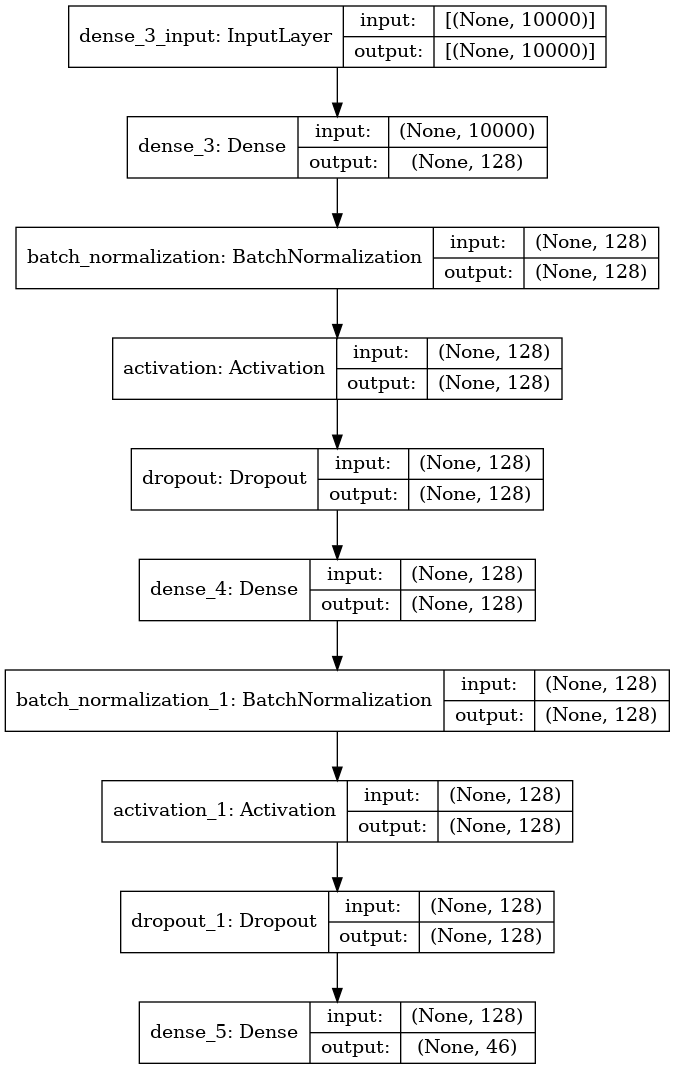

In [19]:
utils.plot_model(reuters_model(), show_shapes=True)

#### Reuters 모델 학습

In [20]:
reuters_history = reuters_model.train(reuters_X_train, reuters_y_train, reuters_X_val, reuters_y_val)

Epoch 1/60
211/211 [==============================] - 2s 7ms/step - loss: 1.7090 - accuracy: 0.6106 - val_loss: 1.3138 - val_accuracy: 0.7311
Epoch 2/60
211/211 [==============================] - 1s 5ms/step - loss: 1.1142 - accuracy: 0.7423 - val_loss: 1.0238 - val_accuracy: 0.7836
Epoch 3/60
211/211 [==============================] - 1s 5ms/step - loss: 0.8972 - accuracy: 0.7929 - val_loss: 1.0088 - val_accuracy: 0.7872
Epoch 4/60
211/211 [==============================] - 1s 5ms/step - loss: 0.7401 - accuracy: 0.8287 - val_loss: 1.0037 - val_accuracy: 0.7943
Epoch 5/60
211/211 [==============================] - 1s 5ms/step - loss: 0.6664 - accuracy: 0.8447 - val_loss: 1.0278 - val_accuracy: 0.7983
Epoch 6/60
211/211 [==============================] - 1s 5ms/step - loss: 0.5782 - accuracy: 0.8599 - val_loss: 1.0300 - val_accuracy: 0.7961
Epoch 7/60
211/211 [==============================] - 1s 5ms/step - loss: 0.5194 - accuracy: 0.8753 - val_loss: 1.0738 - val_accuracy: 0.8037
Epoch 

#### Reuters 모델 학습 시각화

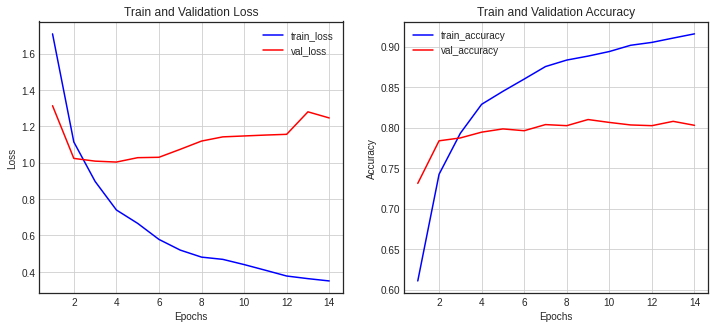

In [21]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = reuters_history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

#### Reuters 모델 평가 및 예측

In [22]:
reuters_model().evaluate(reuters_X_test, reuters_y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.7716


[1.094522476196289, 0.7715939283370972]

---

### CIFAR10 딥러닝 모델

#### 딥러닝 모델에 필요한 라이브러리 호출
> 위에서 진행한 `Boston housing`과`Routers`에서 모두 호출하여 여기서는 생략

#### CIFAR10 데이터셋 호출

In [23]:
from keras.datasets import cifar10

class CIFAR10_Dataset():
    
    def __init__(self):
        (X_train, y_train), (test_data, test_labels) = cifar10.load_data()
        train_data, val_data, train_labels, val_labels = train_test_split(X_train, y_train, 
                                                                          test_size=0.2,
                                                                          random_state=123)
        self.train_data = train_data
        self.val_data = val_data
        self.test_data = test_data
        self.train_labels = train_labels
        self.val_labels = val_labels
        self.test_labels = test_labels
        
        self.class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                            'dog', 'frog', 'horse', 'ship', 'truck']

In [24]:
cifar10 = CIFAR10_Dataset()

In [25]:
cifar10_train_data = cifar10.train_data
cifar10_val_data = cifar10.val_data
cifar10_test_data = cifar10.test_data

#### Train 데이터 0번째인 이미지 시각화

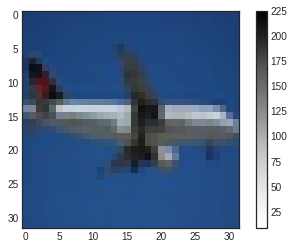

In [26]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(cifar10.train_data[0])
plt.colorbar()
plt.show()

#### Train, Validation, Test 데이터의 Shape 확인

In [27]:
print(cifar10_train_data.shape)
print(cifar10_val_data.shape)
print(cifar10_test_data.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


#### Train, Validation, Test 데이터 Shape 변환

In [28]:
cifar10_train_data = cifar10_train_data.reshape(-1, 32 * 32 * 3)
cifar10_val_data = cifar10_val_data.reshape(-1, 32 * 32 * 3)
cifar10_test_data = cifar10_test_data.reshape(-1, 32 * 32 * 3)

In [29]:
print(cifar10_train_data.shape)
print(cifar10_val_data.shape)
print(cifar10_test_data.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


#### 각 픽셀을 255로 나누어 [0, 1] 사이의 값으로 변환

In [30]:
cifar10_train_data = cifar10_train_data / 255.
cifar10_val_data = cifar10_val_data / 255.
cifar10_test_data = cifar10_test_data / 255.

#### CIFAR10 모델 구성 및 컴파일

In [31]:
class CIFAR10_Model():
    def __init__(self):
        self.model = models.Sequential()
        self.model.add(layers.Input(shape=(3072, )))
        
        self.model.add(layers.Dense(512))
        self.model.add(layers.BatchNormalization())
        self.model.add(layers.Activation('relu'))
        self.model.add(layers.Dropout(0.4))
        self.model.add(layers.Dense(10, activation='softmax'))
        self.model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        
        self.check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', 
                                           save_best_only=True)
        self.early_stopping_cb = callbacks.EarlyStopping(patience=3, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
        print("Init")

    def __call__(self):
        return self.model
    
    def train(self, train_data, train_labels, val_data, val_labels):
        history = self.model.fit(train_data, train_labels,
                    epochs=60,
                    validation_data=(val_data, val_labels),
                    callbacks=[self.check_point_cb, self.early_stopping_cb])
        return history

In [32]:
cifar10_model = CIFAR10_Model()

Init


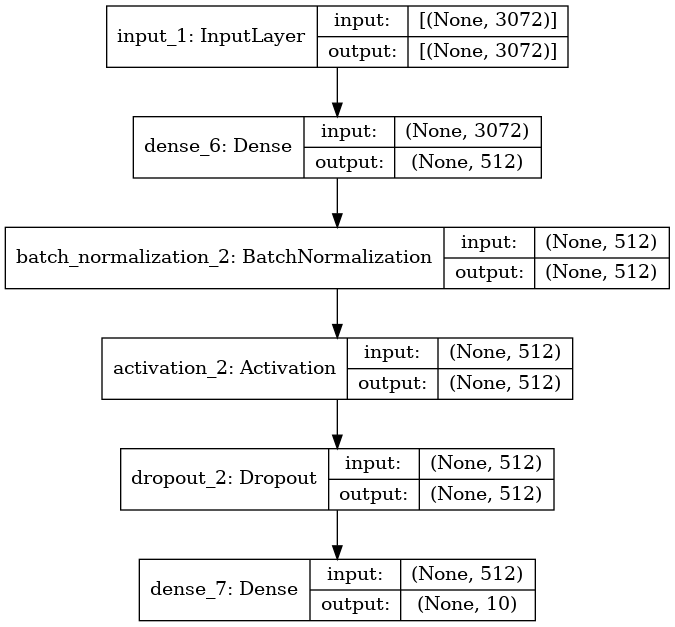

In [33]:
utils.plot_model(cifar10_model(), show_shapes=True)

#### CIFAR10 모델 학습

In [34]:
cifar10_history = cifar10_model.train(cifar10_train_data, cifar10.train_labels, cifar10_test_data, cifar10.test_labels)

Epoch 1/60
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9043 - accuracy: 0.3447 - val_loss: 1.6405 - val_accuracy: 0.4199
Epoch 2/60
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6687 - accuracy: 0.4155 - val_loss: 1.5867 - val_accuracy: 0.4349
Epoch 3/60
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5887 - accuracy: 0.4424 - val_loss: 1.5351 - val_accuracy: 0.4628
Epoch 4/60
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5421 - accuracy: 0.4586 - val_loss: 1.5133 - val_accuracy: 0.4694
Epoch 5/60
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5006 - accuracy: 0.4733 - val_loss: 1.4985 - val_accuracy: 0.4699
Epoch 6/60
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4714 - accuracy: 0.4844 - val_loss: 1.4692 - val_accuracy: 0.4847
Epoch 7/60
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4492 - accuracy: 0.4942 - val_loss: 1.4635 - val_accuracy:

#### Reuters 모델 학습 시각화

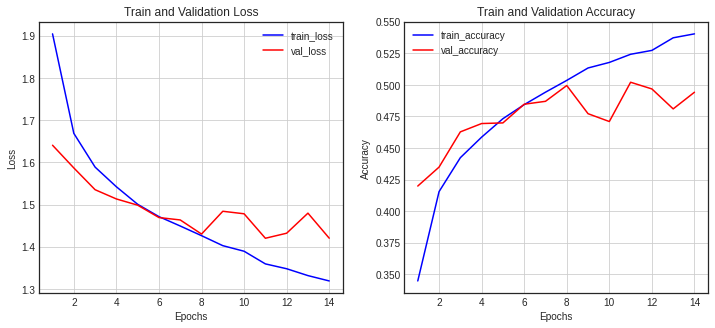

In [35]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = cifar10_history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

#### CIFAR10 모델 평가 및 예측

In [36]:
cifar10_model().evaluate(cifar10_test_data, cifar10.test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.4201 - accuracy: 0.5021


[1.420149803161621, 0.5020999908447266]